### sklearn.metrics.roc_curve
sklearn.metrics.roc_curve(_y_true_,  _y_score_,  _*_,  _pos_label=None_,  _sample_weight=None_,  _drop_intermediate=True_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/f3f51f9b6/sklearn/metrics/_ranking.py#L892)[](https://scikit-learn.org/1.1/modules/generated/sklearn.metrics.roc_curve.html?highlight=roc+curve#sklearn.metrics.roc_curve "Permalink to this definition")

Returns:

**fpr**
ndarray of shape (>2,)

Increasing false positive rates such that element i is the false positive rate of predictions with score >=  `thresholds[i]`.

**tpr**
ndarray of shape (>2,)

Increasing true positive rates such that element  `i`  is the true positive rate of predictions with score >=  `thresholds[i]`.

**thresholds**
ndarray of shape = (n_thresholds,)

Decreasing thresholds on the decision function used to compute fpr and tpr.  `thresholds[0]`  represents no instances being predicted and is arbitrarily set to  `max(y_score)  +  1`.

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

def fillna(df):
    df["Age"].fillna(df["Age"].mean(), inplace=True)
    df["Cabin"].fillna("N", inplace=True)
    df["Embarked"].fillna("N", inplace=True)
    df["Fare"].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId','Name','Fare','Ticket','SibSp','Parch'], axis=1, inplace=True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
#         df[feature] = le.fit_transform(df[feature])
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,dpred)
    accuracy = accuracy_score(y_test,dpred)
    precision = precision_score(y_test,dpred)
    recall = recall_score(y_test,dpred)
    # f1 스코어 추가
    f1 = f1_score(y_test, dpred)
    print('오차 행렬')
    print(confusion)
    print(f'정확도: {np.round(accuracy,4)},정밀도{np.round(precision,4)}, 재현율{np.round(recall,4)}, F1{np.round(f1, 4)}')

In [54]:
y_test = pd.read_csv('./datasets/gender_submission.csv')
y_test = y_test['Survived']

train_df = pd.read_csv('./datasets/titanic_train.csv')
test_df = pd.read_csv('./datasets/titanic_test.csv')
train_df = transform_features(train_df)
test_df = transform_features(test_df)

label = train_df['Survived']
features = train_df.drop(columns='Survived')
x_train = features
y_train = label

In [55]:
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(test_df)
pred_proda = lr_clf.predict_proba(test_df)

In [56]:
lr_clf = LogisticRegression()

lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(test_df)

pred_proba = lr_clf.predict_proba(test_df)
print(pred_proba[:5])
print(lr_pred[:5])

[[0.90004657 0.09995343]
 [0.56777228 0.43222772]
 [0.89778678 0.10221322]
 [0.89259509 0.10740491]
 [0.36447892 0.63552108]]
[0 0 0 0 1]


샘플 index로 추출한 임계값: [0.97 0.88 0.83 0.77 0.66 0.63 0.61 0.59 0.57 0.54 0.51 0.41 0.27 0.25
 0.22 0.16 0.14 0.13 0.11 0.1  0.1  0.08] 

fpr: [0.   0.   0.   0.   0.01 0.01 0.02 0.03 0.05 0.06 0.08 0.14 0.27 0.33
 0.39 0.47 0.55 0.65 0.75 0.8  0.92 0.96] 

tpr: [0.01 0.25 0.41 0.54 0.64 0.72 0.84 0.87 0.88 0.96 0.99 1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.  ]


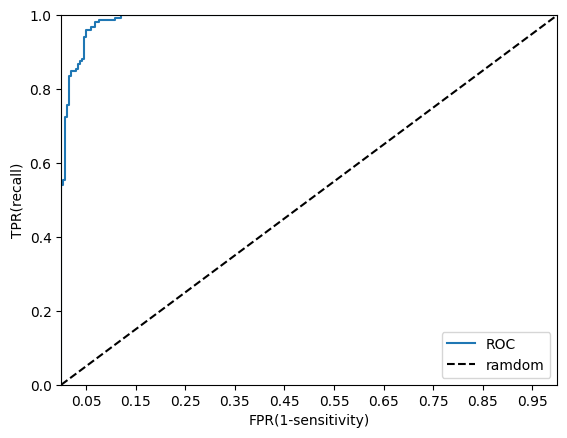

Roc Auc score 0.9888


In [59]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

pred_proba_class1 = lr.predict_proba(x_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test,pred_proba_class1)
# 반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임계값을 5step으로 추출.
# threshold[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작

thr_index = np.arange(1,thresholds.shape[0],5)
print('샘플 index로 추출한 임계값:', np.round(thresholds[thr_index],2),"\n")

## 임계값에 따른 fpr.tpr
print('fpr:',np.round(fprs[thr_index],2),"\n")
print('tpr:',np.round(tprs[thr_index],2))


def roc_curve_plot(y_test,pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test,pred_proba_c1)
    
    # Roc curve를 plot 곡선으로 기름
    plt.plot(fprs,tprs,label='ROC')
    ## 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1],"k--",label="ramdom")
    
    ## fpr x축을 scale을 0.1단위로 변경 x,y축 명 설정
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1-sensitivity)')
    plt.ylabel('TPR(recall)')
    plt.legend()
    plt.show()

roc_curve_plot(y_test,pred_proba_class1)

from sklearn.metrics import roc_auc_score
pred_proba = lr.predict_proba(x_test)
roc_score_prob = roc_auc_score(y_test,pred_proba[:,1])
print(f'Roc Auc score {np.round(roc_score_prob,4)}')

샘플 index로 추출한 임계값: [0.97 0.88 0.83 0.77 0.66 0.63 0.61 0.59 0.57 0.54 0.51 0.41 0.27 0.25
 0.22 0.16 0.14 0.13 0.11 0.1  0.1  0.08] 

fpr: [0.   0.   0.   0.   0.01 0.01 0.02 0.03 0.05 0.06 0.08 0.14 0.27 0.33
 0.39 0.47 0.55 0.65 0.75 0.8  0.92 0.96] 

tpr: [0.01 0.25 0.41 0.54 0.64 0.72 0.84 0.87 0.88 0.96 0.99 1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.  ]


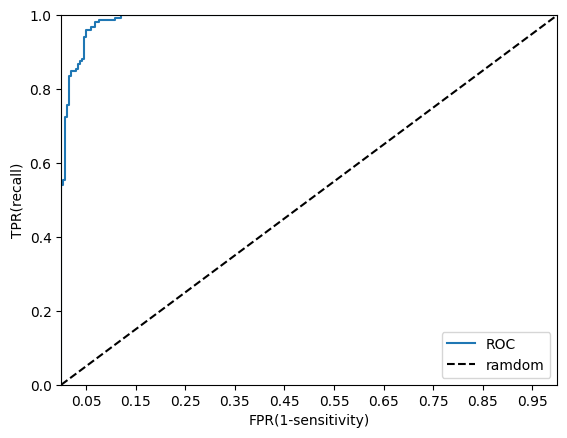

Roc Auc score 0.9888


In [58]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

train_df = pd.read_csv("./datasets/titanic_train.csv")
test_df = pd.read_csv("./datasets/titanic_test.csv")
y_test = pd.read_csv('./datasets/gender_submission.csv')
y_test = y_test['Survived']


# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

train_df = transform_features(train_df)
test_df = transform_features(test_df)

# label,feature
x_train = train_df.drop("Survived",axis=1)
y_train = train_df['Survived']
x_test = test_df

## logistic regression
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
pred_proba = lr.predict_proba(x_test)

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr.predict_proba(x_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test,pred_proba_class1)
# 반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임계값을 5step으로 추출.
# threshold[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작

thr_index = np.arange(1,thresholds.shape[0],5)
print('샘플 index로 추출한 임계값:', np.round(thresholds[thr_index],2),"\n")

## 임계값에 따른 fpr.tpr
print('fpr:',np.round(fprs[thr_index],2),"\n")
print('tpr:',np.round(tprs[thr_index],2))


def roc_curve_plot(y_test,pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test,pred_proba_c1)
    
    # Roc curve를 plot 곡선으로 기름
    plt.plot(fprs,tprs,label='ROC')
    ## 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1],"k--",label="ramdom")
    
    ## fpr x축을 scale을 0.1단위로 변경 x,y축 명 설정
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1-sensitivity)')
    plt.ylabel('TPR(recall)')
    plt.legend()
    plt.show()

roc_curve_plot(y_test,pred_proba_class1)

from sklearn.metrics import roc_auc_score
pred_proba = lr.predict_proba(x_test)
roc_score_prob = roc_auc_score(y_test,pred_proba[:,1])
print(f'Roc Auc score {np.round(roc_score_prob,4)}')